In [1]:
%%html
<style>
table {align:left;display:block}
</style>

# Baby Goods Shopping on Taobao.com Analysis

## Dataset

**(sample) sam_tianchi_mum_baby.csv**

| Column | Description |
| :--- | :--- |
| user_id | User ID (Bigint). |
| birthday | Children's birthday(e.g. 20130423) |
| gender | Children's gender ("0" denotes female, "1" denotes male, "2" denotes unknown) |

</br>  

**(sample) sam_tianchi_mum_baby_trade_history.csv**  

| Column | Description |
| :--- | :--- |
| item_id | Item ID (Bigint). |
| user_id | User ID (Bigint). |
| auction_id | Auction ID (Bigint). |
| cat_id | Category ID (Bigint). |
| cat1 | Root category ID (Bigint). |
| property | Property of the corresponding item (String). |
| buy_mount | Purchase quantity (Bigint). |
| day | Timestamp. |

 
 
## Introduction
Ali_Mum_Baby is a dataset that contains more than 9 million children's info (birthday and gender) provided by consumers who share the information in order to receive better recommendations or search results. Since the dataset is too big, we can only download the sample dataset provided.
Typically, this dataset is used to:
- predict children's ages based on their parents' purchase behavior
- predict what kind of goods a user would buy based on their children's info (age, gender etc.)

## My Goals:
Through dataset baby, I can know the birthdates of babies for different user ids.
Through dataset trade, I can know the number of trades, date, and the categories bought by different user ids.

- sales: comparing sales for each year, season, month, day
- product categories: which categories are the most popular, which are the least popular
- babies and products: which age range/gender buy which products the most
- repeat buys: the rate of repeat buyers

<img src="Baby%20Goods%20Analysis.png" alt="Drawing" style="width: 700px;"/>

## Load Data and Data Cleaning

### Trade data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts.charts as pyc
import pyecharts.options as opts
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [162]:
data_trade = pd.read_csv('(sample)sam_tianchi_mum_baby_trade_history.csv')
data_baby = pd.read_csv('(sample)sam_tianchi_mum_baby.csv')

In [5]:
data_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     29971 non-null  int64 
 1   auction_id  29971 non-null  int64 
 2   cat_id      29971 non-null  int64 
 3   cat1        29971 non-null  int64 
 4   property    29827 non-null  object
 5   buy_mount   29971 non-null  int64 
 6   day         29971 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ MB


In [6]:
# convert column day into datetime
data_trade['day'] = pd.to_datetime(data_trade.day.astype(str))
data_trade.head()

,user_id,auction_id,cat_id,cat1,property,buy_mount,day
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,2014-09-19
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,2013-10-11
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,2013-10-11
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,2014-10-23
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,2014-11-03


In [7]:
# add year, month, quarter col 
data_trade['year'] = data_trade.day.dt.year
data_trade['quarter'] = data_trade.day.dt.quarter
data_trade['month'] = data_trade.day.dt.month
data_trade['dayofweek'] = data_trade.day.dt.dayofweek

data_trade.head()

,user_id,auction_id,cat_id,cat1,property,buy_mount,day,year,quarter,month,dayofweek
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,2014-09-19,2014,3,9,4
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,2013-10-11,2013,4,10,4
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,2013-10-11,2013,4,10,4
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,2014-10-23,2014,4,10,3
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,2014-11-03,2014,4,11,0


**Since property does not make too much sense for the analysis because they are seller-defined data, we drop the col:**

In [8]:
data_trade = data_trade.drop('property', axis=1)

In [9]:
data_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     29971 non-null  int64         
 1   auction_id  29971 non-null  int64         
 2   cat_id      29971 non-null  int64         
 3   cat1        29971 non-null  int64         
 4   buy_mount   29971 non-null  int64         
 5   day         29971 non-null  datetime64[ns]
 6   year        29971 non-null  int64         
 7   quarter     29971 non-null  int64         
 8   month       29971 non-null  int64         
 9   dayofweek   29971 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 2.3 MB


In [10]:
# check for missing values
print('Null Values:\n', data_trade.isnull().sum())

# check for duplicated values
print('\nDuplicated Values:\n', data_trade.duplicated().sum())

Null Values:
 user_id       0
auction_id    0
cat_id        0
cat1          0
buy_mount     0
day           0
year          0
quarter       0
month         0
dayofweek     0
dtype: int64

Duplicated Values:
 0


In [11]:
# look at the date range of the trade
data_trade.day.describe()

count                   29971
unique                    949
top       2014-11-11 00:00:00
freq                      454
first     2012-07-02 00:00:00
last      2015-02-05 00:00:00
Name: day, dtype: object

In [12]:
# the trade day range between 2012-07-02 to 2015-02-05
# to better understand the seasonality or trend in this, we only get data between 2013-01-01 to 2014-12-31
data_trade = data_trade[(data_trade.day >= '2013-01-01') & (data_trade.day <= '2014-12-31')]
data_trade.day.describe()

count                   24777
unique                    730
top       2014-11-11 00:00:00
freq                      454
first     2013-01-01 00:00:00
last      2014-12-31 00:00:00
Name: day, dtype: object

In [13]:
# look at the trade amount
data_trade.buy_mount.describe()

count    24777.000000
mean         2.625580
std         69.594626
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      10000.000000
Name: buy_mount, dtype: float64

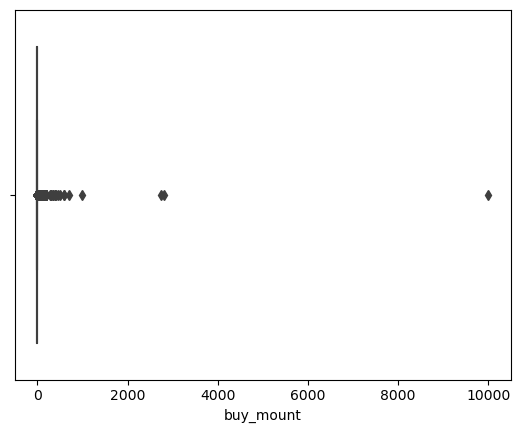

In [14]:
data_trade.sort_values(by=['buy_mount'], ascending=False)

sns.boxplot(x = data_trade.buy_mount)
plt.show()

**There is a maximum buy amount of 10000, the possibilities of buying 10000 products at once is very unlikely for individual users. Hence we need to handle these outliers. I will be using standard deviation removing method.**  

>The standard deviation approach to removing outliers requires the user to choose a number of standard deviations at which to differentiate outlier from non-outlier.

**This then begs the question, how many standard deviations should you choose?  
The common industry practice is to use 3 standard deviations away from the mean to differentiate outlier from non-outlier. By using 3 standard deviations we remove the 0.3% extreme cases. Depending on your use case, you may want to consider using 4 standard deviations which will remove just the top 0.1%.**

Reference: <a href="https://stephenallwright.com/remove-outliers-pandas/#:~:text=Methods%20to%20detect%20outliers%20in%20a%20Pandas%20DataFrame&text=There%20are%20a%20number%20of,data%20has%20a%20Gaussian%20distribution">How to Handle Outliers</a>

In [15]:
# since the sd is 69, we take 3 * 69 = 207  to remove the extreme cases.

data_trade = data_trade[(data_trade.buy_mount >= 1) & (data_trade.buy_mount <= 207)]
data_trade.buy_mount.describe()

count    24759.000000
mean         1.719657
std          6.261718
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        200.000000
Name: buy_mount, dtype: float64

### Baby data

In [16]:
data_baby.head()
data_baby.info()
data_baby.gender.value_counts()
# boys 489, girls 438, unknown 26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   953 non-null    int64
 1   birthday  953 non-null    int64
 2   gender    953 non-null    int64
dtypes: int64(3)
memory usage: 22.5 KB


0    489
1    438
2     26
Name: gender, dtype: int64

In [17]:
# we will only be looking at boys and girls, removing the unknown rows
data_baby.drop(data_baby[data_baby.gender == 2].index, inplace=True)

In [18]:
# check for missing values
print('Null Values:\n', data_baby.isnull().sum())

# check for duplicated values
print('\nDuplicated Values:\n', data_baby.duplicated().sum())


Null Values:
 user_id     0
birthday    0
gender      0
dtype: int64

Duplicated Values:
 0


In [19]:
# convert column birthday into datetime
data_baby['birthday'] = pd.to_datetime(data_baby.birthday.astype(str))

data_baby.birthday.describe()

count                     927
unique                    793
top       2013-03-09 00:00:00
freq                        4
first     1984-06-16 00:00:00
last      2015-08-15 00:00:00
Name: birthday, dtype: object

In [20]:
# The birthday starts from the year 1984 which does not make sense considering Taobao was founded in 2003
# we choose data after the year 2003

data_baby = data_baby[data_baby.birthday >= '2004-01-01']
data_baby.birthday.describe()

count                     922
unique                    788
top       2013-03-09 00:00:00
freq                        4
first     2004-03-23 00:00:00
last      2015-08-15 00:00:00
Name: birthday, dtype: object

## Analysis

### Lets look at the sales for each time period

In [21]:
print(data_trade.columns)
print(data_baby.columns)

Index(['user_id', 'auction_id', 'cat_id', 'cat1', 'buy_mount', 'day', 'year',
       'quarter', 'month', 'dayofweek'],
      dtype='object')
Index(['user_id', 'birthday', 'gender'], dtype='object')


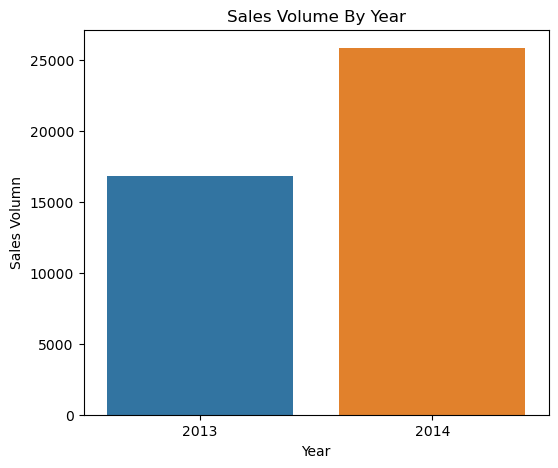

In [22]:
year_stats = data_trade.groupby(by='year')['buy_mount'].sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=year_stats.index, y=year_stats.values)
plt.title("Sales Volume By Year")
plt.xlabel("Year")
plt.ylabel("Sales Volumn")
plt.show()

#### There are only two years of data to compare hence not much meaning can be read from this comparison.

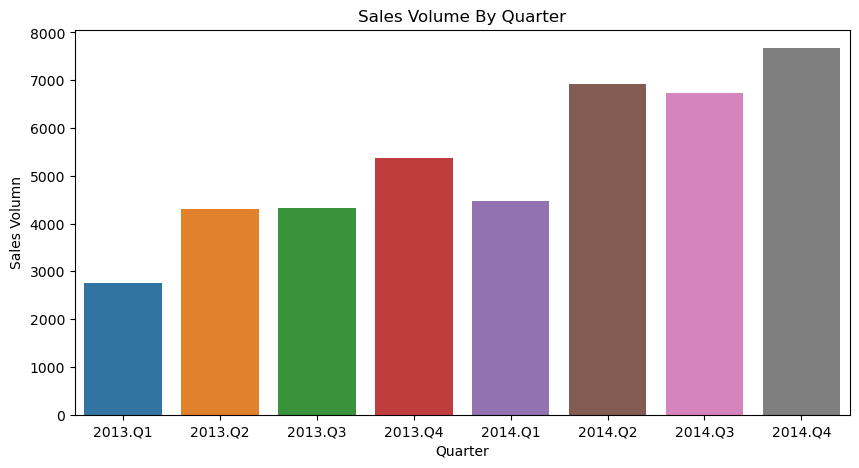

In [23]:
quarter_stats = data_trade.groupby(by=['year', 'quarter'])['buy_mount'].sum()
quarter_stats.index

# convert index into readable form to plot on graph
x_coordinates = [str(q[0]) + ".Q" + str(q[1]) for q in quarter_stats.index]
y_coordinates = [q for q in quarter_stats.values]

plt.figure(figsize=(10, 5))
sns.barplot(x=x_coordinates, y=y_coordinates)
plt.title("Sales Volume By Quarter")
plt.xlabel("Quarter")
plt.ylabel("Sales Volumn")
plt.show()

#### From this quarter sales volume, we can tell that Q1 has the lowest sales among other quarteres while Q4 for each year has the highest sales among other quarters. 

- The lowest sales at both Q1 might be due to the Chinese Lunar New Year holiday.

- The highest point at both Q4 might be Q4 having two of the biggest sales in China - 11.11 and 12.12 together, boosting the number. Also people tend to spend more during year end to reward themselves for the hard work during the year.

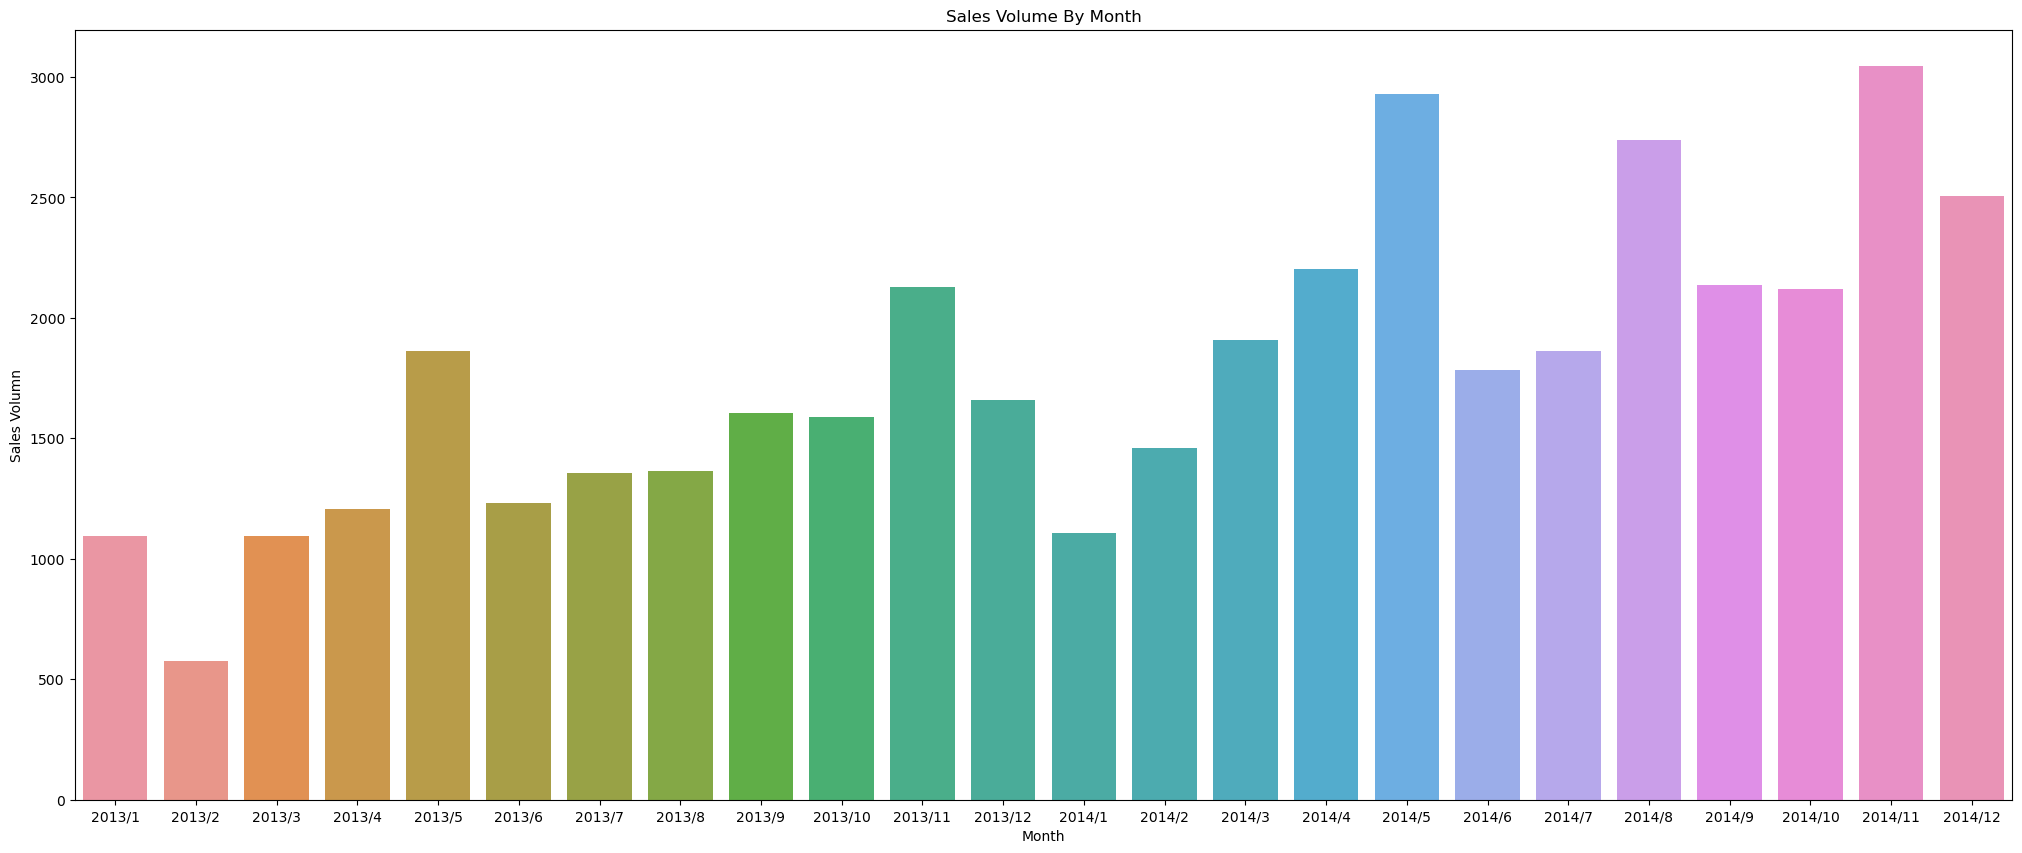

In [24]:
month_stats = data_trade.groupby(by=['year', 'month'])['buy_mount'].sum()
month_stats.index

# convert index into readable form to plot on graph
x_coordinates = [str(q[0]) + "/" + str(q[1]) for q in month_stats.index]
y_coordinates = [q for q in month_stats.values]

plt.figure(figsize=(25, 10))
sns.barplot(x=x_coordinates, y=y_coordinates)
plt.title("Sales Volume By Month")
plt.xlabel("Month")
plt.ylabel("Sales Volumn")
plt.show()

#### 2013/2 and 2014/1 has the lowest sales throughout each year respectively. After searching through the calendar, we can know that both are the month of Chinese Lunar New Year, confirming the hypothesis that the low sales are due to the holiday.

#### Both Novembers have the highest sales of each year, showing that the sales are indeed boosted by the 11.11 promotion.

#### Lets take a look at sales for each day in November and December 2014:

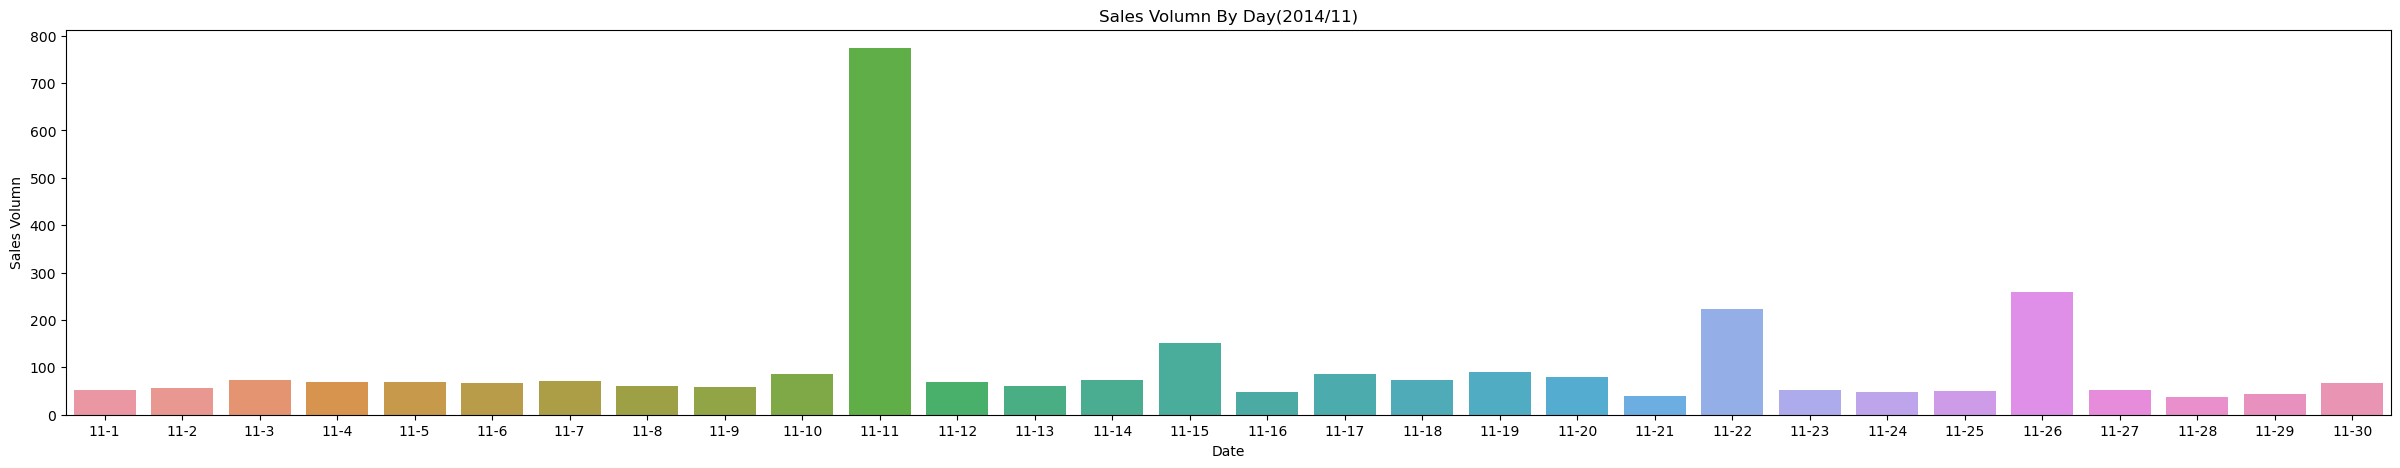

In [25]:
data_trade_201411 = data_trade[(data_trade.day >= '2014-11-01') & (data_trade.day <= '2014-11-30')]
day_stats = data_trade_201411.groupby(by='day')['buy_mount'].sum()

plt.figure(figsize=(30, 5))
x_list = [str(idx.month) + '-' + str(idx.day) for idx in day_stats.index]
y_list = [int(value) for value in day_stats.values]
sns.barplot(x=x_list, y=y_list)

plt.title("Sales Volumn By Day(2014/11)")
plt.xlabel("Date")
plt.ylabel("Sales Volumn")
plt.show()

#### We can see that the sales reach higest point on 11.11 because of the promotion.

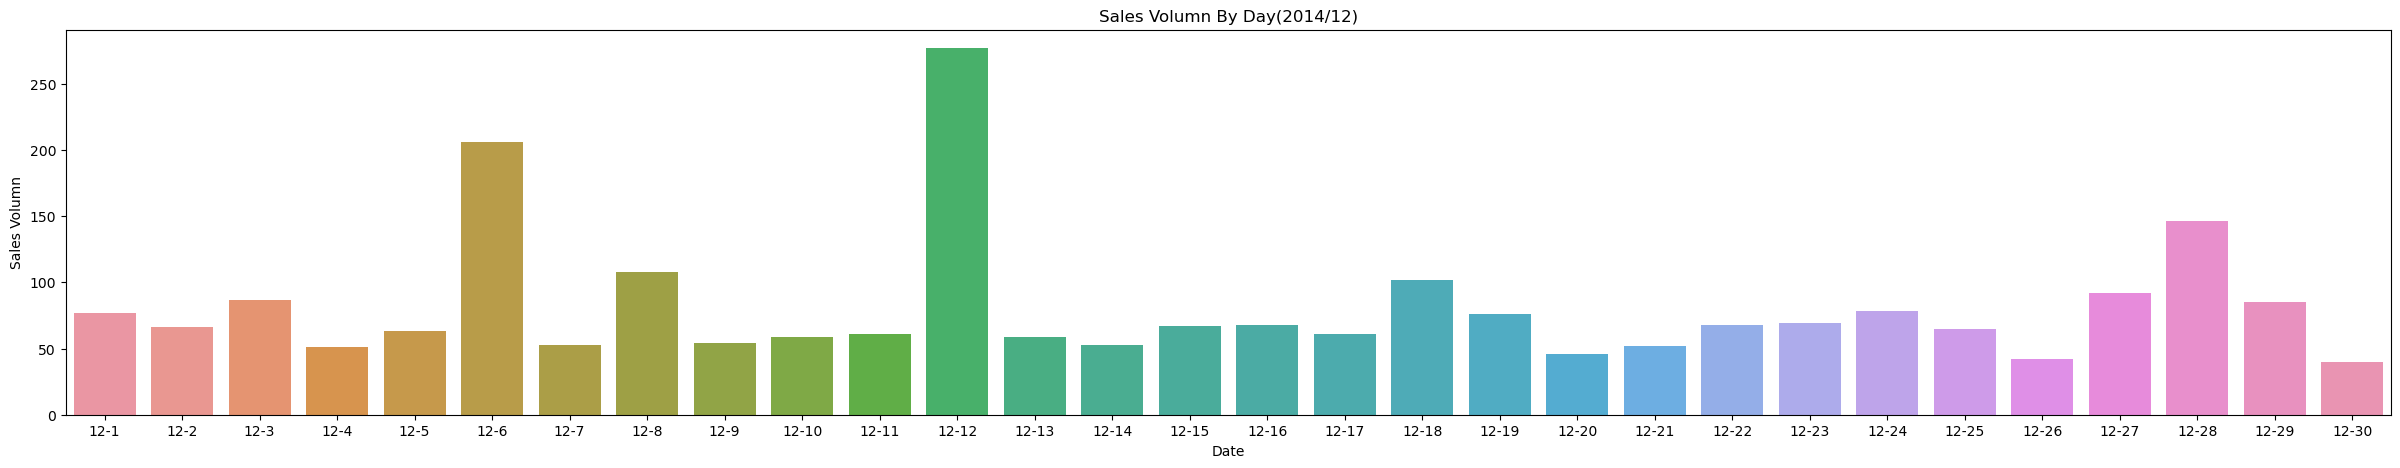

In [26]:
data_trade_201412 = data_trade[(data_trade.day >= '2014-12-01') & (data_trade.day <= '2014-12-30')]
day_stats = data_trade_201412.groupby(by='day')['buy_mount'].sum()

plt.figure(figsize=(30, 5))
x_list = [str(idx.month) + '-' + str(idx.day) for idx in day_stats.index]
y_list = [int(value) for value in day_stats.values]
sns.barplot(x=x_list, y=y_list)

plt.title("Sales Volumn By Day(2014/12)")
plt.xlabel("Date")
plt.ylabel("Sales Volumn")
plt.show()

#### We can see that the sales reach higest point on 12.12 because of the promotion too.

### Lets look at the sales of each product category

In [27]:
print(data_trade.columns)

Index(['user_id', 'auction_id', 'cat_id', 'cat1', 'buy_mount', 'day', 'year',
       'quarter', 'month', 'dayofweek'],
      dtype='object')


In [28]:
print('Cat_id: ', data_trade.cat_id.nunique())
print('\nCat1: ', data_trade.cat1.nunique())

# cat1 is the bigger category with 6 categories while cat_id has more specific categories and has 615.

Cat_id:  615

Cat1:  6


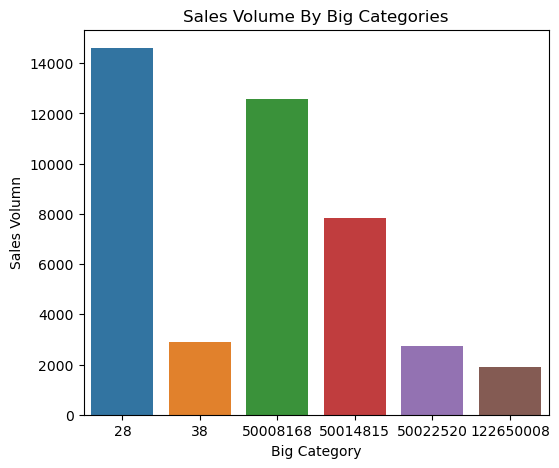

In [29]:
big_cat_stats = data_trade.groupby(by='cat1')['buy_mount'].sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=big_cat_stats.index, y=big_cat_stats.values)
plt.title("Sales Volume By Big Categories")
plt.xlabel("Big Category")
plt.ylabel("Sales Volumn")
plt.show()

#### Category 28 contributes to the most sales volume. It might be because it has lots of different small categories.

In [30]:
a = data_trade.groupby("cat1")["buy_mount"].sum()
marketshare = pd.DataFrame()
marketshare['sales_volume'] = a 
marketshare['market_share_perc']=marketshare['sales_volume']/(marketshare['sales_volume'].sum())
marketshare

,sales_volume,market_share_perc
cat1,,
28,14604,0.343002
38,2898,0.068065
50008168,12586,0.295606
50014815,7855,0.184489
50022520,2727,0.064049
122650008,1907,0.044789


In [31]:
# calculating percentage
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)

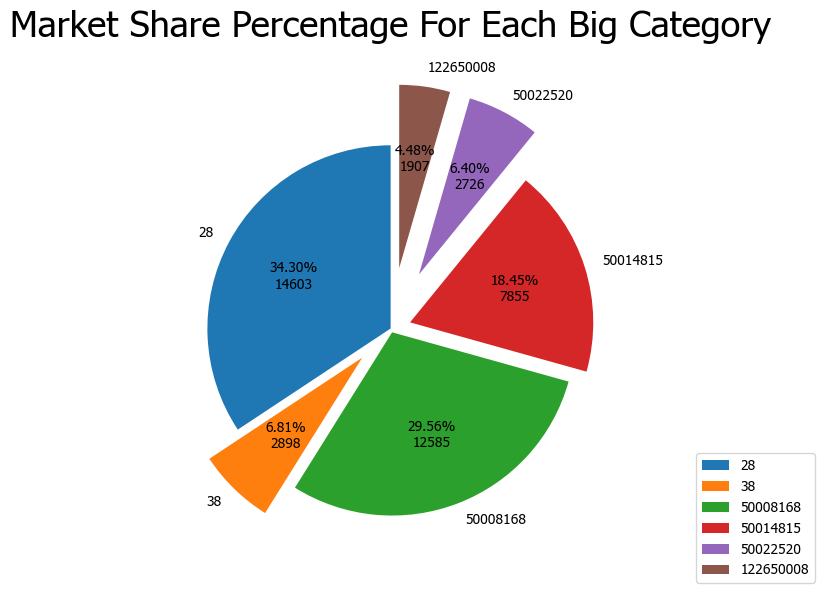

In [32]:
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
labels=marketshare.index
values=np.array(marketshare['sales_volume'])

fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.1,startangle=90,explode=[0,0.2,0.02,0.1,0.3,0.3],autopct=lambda x:func(x,values),textprops=dict(fontsize=10),radius=0.9)
fig.suptitle('Market Share Percentage For Each Big Category',fontsize=26)
fig.tight_layout()
sub.legend()
plt.legend(bbox_to_anchor=(1.1,0), loc=3, borderaxespad=0)
plt.show()

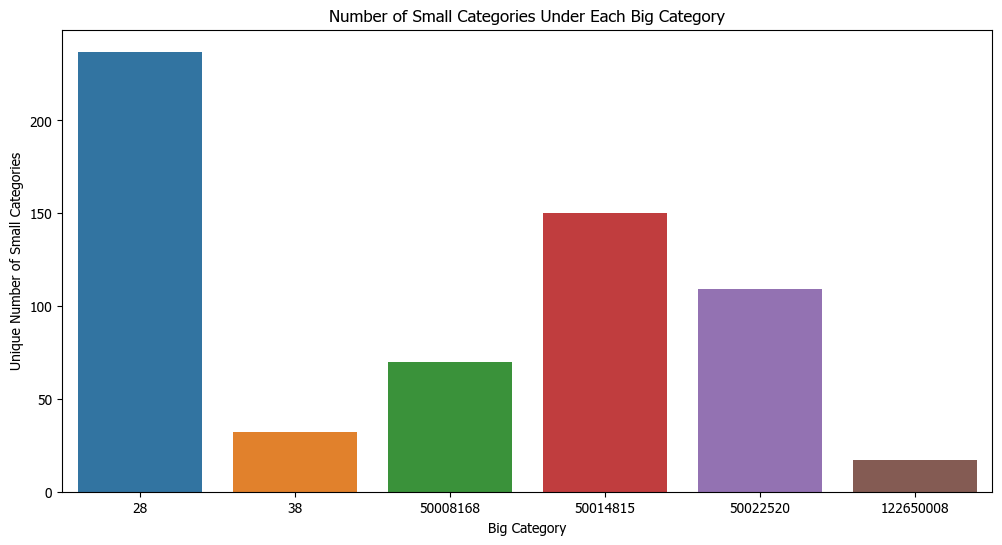

In [33]:
sma_cat_stats = data_trade.groupby('cat1')['cat_id'].nunique()

sns.barplot(x=sma_cat_stats.index, y=sma_cat_stats.values)
plt.title("Number of Small Categories Under Each Big Category")
plt.xlabel("Big Category")
plt.ylabel("Unique Number of Small Categories")
plt.show()

# Big category 28 has the most number of small categories

#### Category 28 has the most number of different small categories to contribute to its largest sales volume, confirming the hypothesis before.


## Lets look at the relationship between babies and the product sales

In [60]:
# merge the baby and trade data, get baby age at the time of shopping
# how age range affects the product they buy

data_t = pd.merge(data_trade, data_baby, on='user_id')
data_t

data_t['Age'] = round((data_t.day - data_t.birthday) / pd.Timedelta(days=365),1)
data_t 

,user_id,auction_id,cat_id,cat1,buy_mount,day,year,quarter,month,dayofweek,birthday,gender,Age
0,757254614,35900705534,50013711,50008168,1,2013-12-20,2013,4,12,4,2009-05-28,0,4.6
1,275261625,23062392785,50010558,50008168,1,2013-06-10,2013,2,6,0,2010-05-25,0,3.0
2,35832151,19178578964,50012451,50008168,1,2014-02-28,2014,1,2,4,2009-04-01,1,4.9
3,373726419,24033632962,50008727,50014815,1,2013-08-02,2013,3,8,4,2013-08-28,0,-0.1
4,31795068,20749016489,121394024,50008168,1,2014-12-12,2014,4,12,4,2007-11-24,0,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,685332320,12781785338,50018831,50014815,2,2013-06-01,2013,2,6,5,2012-02-23,0,1.3
757,389326420,17164967407,50006820,28,1,2014-09-16,2014,3,9,1,2013-07-17,0,1.2
758,359840716,17513925908,50013207,50008168,1,2013-03-18,2013,1,3,0,2009-01-20,0,4.2
759,1372572,16915013171,50008845,28,1,2013-03-27,2013,1,3,2,2012-01-30,1,1.2


In [78]:
data_t.sort_values(by=['Age'])

# age contains negative value, we remove them(but analysis can be done on this for woman still in pregnant)
data_t = data_t[data_t.Age >= 0]
data_t['Age'] = data_t['Age'].mask(data_t.Age == -0, 0)
data_t["gender"].replace(1, "B", inplace=True)
data_t["gender"].replace(0, "G", inplace=True)

In [80]:
data_t.sort_values(by=['Age'])
data_t.Age.describe()

# min age is 0 which is for new born, max age is 9

count    658.000000
mean       2.104255
std        1.857900
min        0.000000
25%        0.700000
50%        1.600000
75%        3.100000
max        9.900000
Name: Age, dtype: float64

### Different sales for different genders:

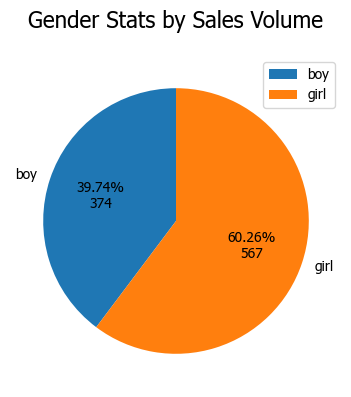

In [108]:
# look at how gender affects the sales

# plot pie chart on sales for each gender
plt.rcParams['figure.figsize'] = [7,4]
gender_by_sales = data_t.groupby('gender')['buy_mount'].sum()

labels = ['boy','girl']
values = np.array([gender_by_sales[0], gender_by_sales[1]])

fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values, labels=labels, startangle=90, autopct=lambda x: func(x,values))
sub.legend()
fig.suptitle('Gender Stats by Sales Volume',fontsize=16)
fig.tight_layout()
plt.show()

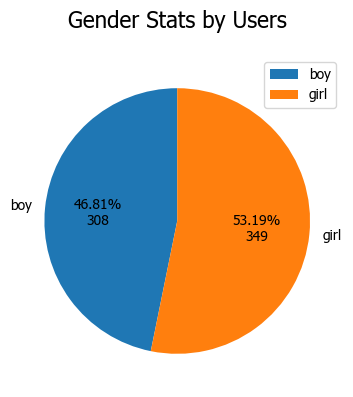

In [115]:
# plot pie chart on users for each gender
gender_by_users = data_t.groupby('gender')['user_id'].count()
gender_by_users
plt.rcParams['figure.figsize'] = [7,4]
labels = ['boy','girl']
values = np.array([gender_by_users[0], gender_by_users[1]])

fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values, labels=labels, startangle=90, autopct=lambda x: func(x,values))
sub.legend()
fig.suptitle('Gender Stats by Users',fontsize=16)
fig.tight_layout()
plt.show()

#### Both results indicate that family with baby girls shop more than family with baby boys.

### Different categories for different genders:

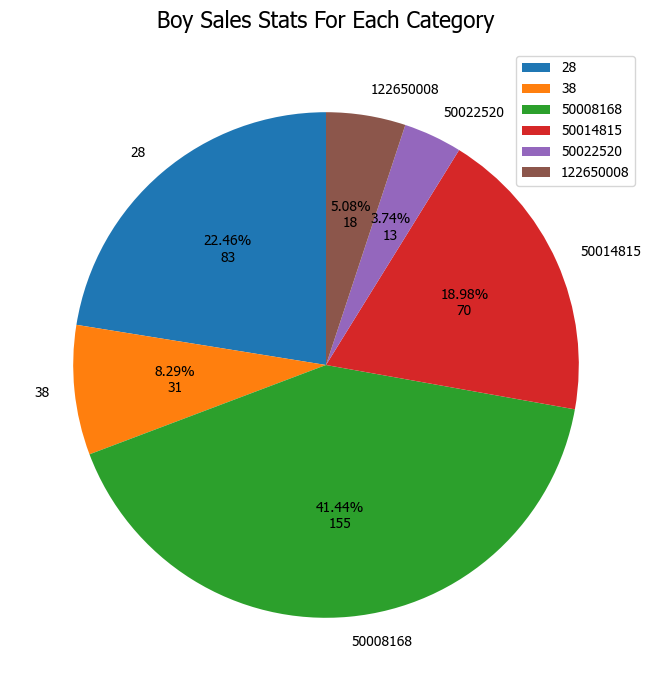

In [127]:
# sales for different cat for boy
gender_sales_by_categories = data_t.groupby(["gender","cat1"])["buy_mount"].sum()
gender_sales_by_categories

plt.rcParams['figure.figsize'] = [8,7]
cat1_list = [28, 38, 50008168, 50014815, 50022520, 122650008]
values = np.array([gender_sales_by_categories.loc['B', category] for category in cat1_list])

fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values, labels=cat1_list, startangle=90, autopct=lambda x: func(x,values))
sub.legend()
fig.suptitle('Boy Sales Stats For Each Category',fontsize=16)
fig.tight_layout()
plt.show()

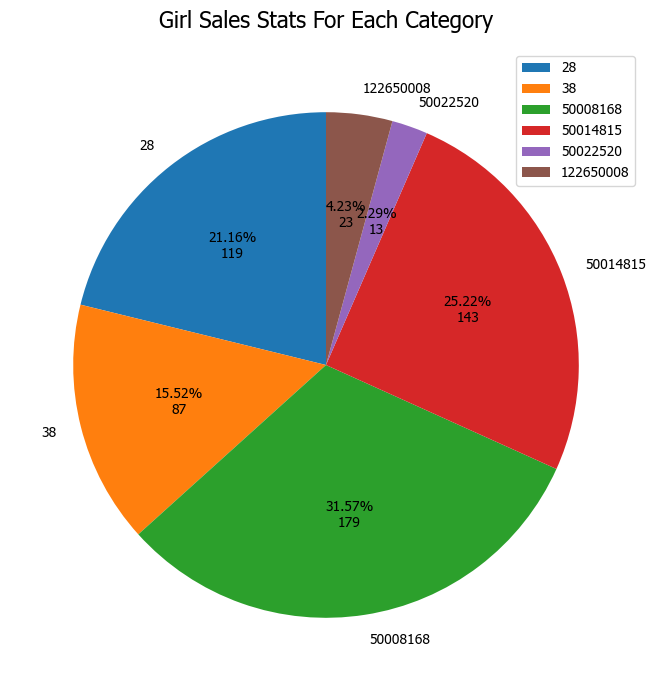

In [128]:
# sales for different cat for girl
plt.rcParams['figure.figsize'] = [8,7]
# cat1_list = [28, 38, 50008168, 50014815, 50022520, 122650008]
values = np.array([gender_sales_by_categories.loc['G', category] for category in cat1_list])

fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values, labels=cat1_list, startangle=90, autopct=lambda x: func(x,values))
sub.legend()
fig.suptitle('Girl Sales Stats For Each Category',fontsize=16)
fig.tight_layout()
plt.show()

### Age

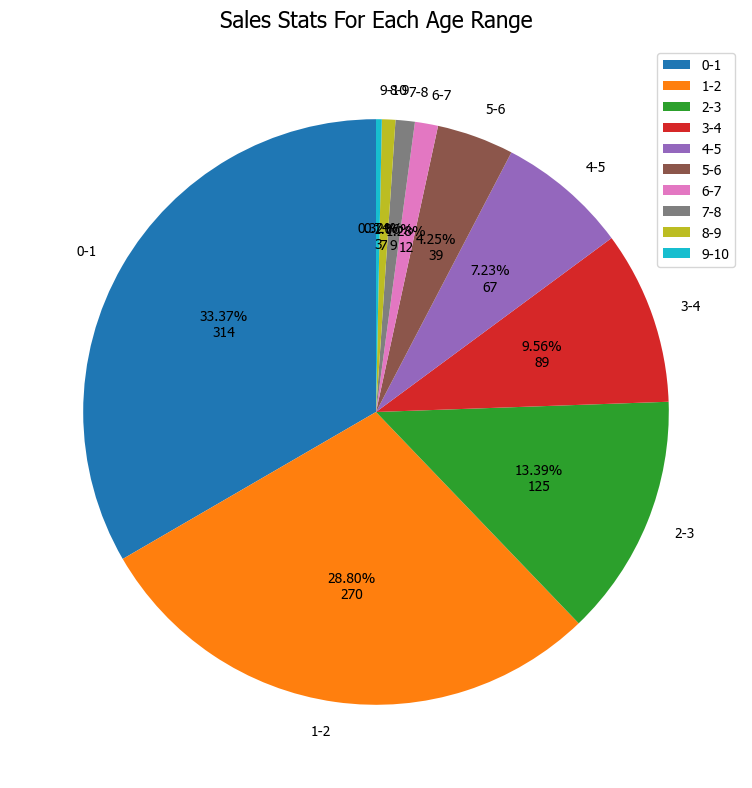

In [154]:
# since age contains decimal points, we group them into age range to better understand
data_t.Age
bins = [0,1,2,3,4,5,6,7,8,9,10]
labels = ['0-1','1-2','2-3','3-4','4-5', '5-6','6-7', '7-8', '8-9', '9-10']
data_t['AgeRange'] = pd.cut(data_t['Age'], labels=labels, bins=bins, right=False)
data_t

plt.rcParams['figure.figsize'] = [13,8]
age_by_sales = data_t.groupby('AgeRange')['buy_mount'].sum()

values=age_by_sales.values

fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values, labels=labels, startangle=90, autopct=lambda x: func(x,values))
sub.legend()
fig.suptitle('Sales Stats For Each Age Range',fontsize=16)
fig.tight_layout()
plt.show()

### We can tell from the pie chart that parents with younger age infants tend to spend more on shopping for baby goods.

## Repurchase rate

In [187]:
data_trade_2 = pd.read_csv('(sample)sam_tianchi_mum_baby_trade_history.csv')

a = data_trade_2.user_id.value_counts()
repeat_buy = pd.DataFrame()
repeat_buy['cnt'] = a

repeat_buy_user_cnt = repeat_buy[repeat_buy.cnt > 1]

repurchase_rate = round(len(repeat_buy_user_cnt.index) / repeat_buy.index.nunique() * 100,2)

print('The repurchase rate is ', repurchase_rate, '%')

The repurchase rate is  0.08 %


#### The repurchase rate is very low, on average the products are only purchased 1 time. This might be due to different age range of babies needs different products. As babies grow, they need other products so this is one thing that cannot be avoided. 
#### But from the analysis before we can see that some products that are consumed faster tend to have higher sales, hence seller should focus on the reason why the repurchase rate is so low, from the aspects of price, competitors, marketing strategies and so on.

## Conclusion

- sales: comparing sales for each year, season, month, day  
**We can tell that the highest point of sales happens at fourth quarter of a year, during November and December, especially on day 11.11 and 12.12 where biggest promotions happen.**  
<br>
<br>

- product categories: which categories are the most popular, which are the least popular  
**We know most people buy category 28 followed by category 50008168, category 122650008 has the least sales, it might be a more expensive product or a product that is not frequently replaced or eliminated like household appliances.**  
<br>
<br>

- babies and products: which age range/gender buy which products the most  
**Parents with baby gender girl tend to spend more money on shopping for baby products. It is good to keep up with targetting parents with baby girls while increasing baby boys product to attract parents with baby gender boy.**
<br>
<br>

- repeat buys: the rate of repeat buyers  
**The repurchase rate is only 0.08% which is very low and seller should consider the reasons behind it. They can focus on the quality of the products, price, competitors or advertisement to make improvements.**
<br>
<br>



*Citation:  
https://github.com/Solitude02/Baby-Goods-Info-Data-Analysis/blob/main/%E6%B7%98%E5%AE%9D%E6%AF%8D%E5%A9%B4%E8%B4%AD%E7%89%A9%E5%88%86%E6%9E%90.ipynb  
https://zhuanlan.zhihu.com/p/65267687*  